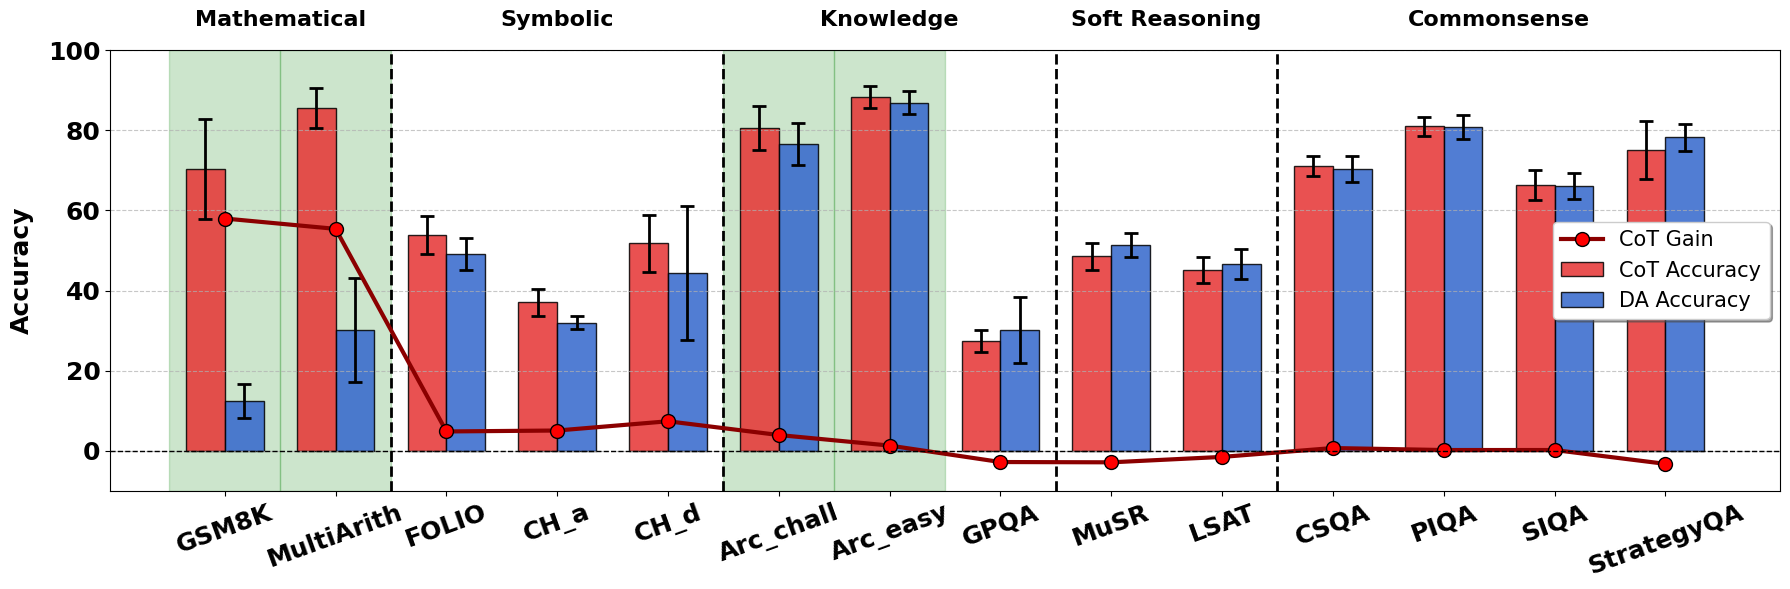

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

categories = ["GSM8K","MultiArith" , "FOLIO" ,"CH_a", "CH_d" ,  "Arc_chall", "Arc_easy","GPQA", "MuSR" ,"LSAT" ,"CSQA",  "PIQA", "SIQA", "StrategyQA"]

values1 = np.mean([  
    [72.10,88.50,48.92,35.21,39.87,73.89,84.39,27.01,44.84,39.74,67.24,77.42,62.69,66.59],  
    [78.24,85.17,59.14,40.29,53.25,86.52,91.71,23.21,53.37,47.97,71.66,81.99,70.57,75.46],  
    [49.58,77.67,49.42,32.37,55.92,76.45,86.99,30.58,45.90,45.00,70.93,80.20,62.64,86.16],  
    [81.20,91.00,58.22,40.21,57.87,85.32,89.73,28.79,50.13,47.67,74.37,84.11,69.50,71.88]
], axis=0)

values2 = np.mean([  
    [ 8.34,20.67,42.61,33.54,19.92,69.88,83.46,37.72,50.93,40.73,65.60,75.68,62.33,79.69],  
    [18.35,44.33,53.32,33.58,60.64,83.36,90.78,16.29,55.69,48.07,73.38,83.41,70.01,73.89],  
    [ 8.34,14.33,51.00,30.17,59.04,73.63,84.68,34.60,47.35,46.58,69.12,81.77,63.56,82.93],  
    [14.25,41.50,49.42,30.50,37.79,79.52,88.64,32.14,51.72,51.04,73.30,82.05,68.68,76.55]
], axis=0)

std1 = np.std([  
    [72.10,88.50,48.92,35.21,39.87,73.89,84.39,27.01,44.84,39.74,67.24,77.42,62.69,66.59],  
    [78.24,85.17,59.14,40.29,53.25,86.52,91.71,23.21,53.37,47.97,71.66,81.99,70.57,75.46],  
    [49.58,77.67,49.42,32.37,55.92,76.45,86.99,30.58,45.90,45.00,70.93,80.20,62.64,86.16],  
    [81.20,91.00,58.22,40.21,57.87,85.32,89.73,28.79,50.13,47.67,74.37,84.11,69.50,71.88]
], axis=0)

std2 = np.std([  
    [ 8.34,20.67,42.61,33.54,19.92,69.88,83.46,37.72,50.93,40.73,65.60,75.68,62.33,79.69],  
    [18.35,44.33,53.32,33.58,60.64,83.36,90.78,16.29,55.69,48.07,73.38,83.41,70.01,73.89],  
    [ 8.34,14.33,51.00,30.17,59.04,73.63,84.68,34.60,47.35,46.58,69.12,81.77,63.56,82.93],  
    [14.25,41.50,49.42,30.50,37.79,79.52,88.64,32.14,51.72,51.04,73.30,82.05,68.68,76.55]
], axis=0)

diff = values1 - values2

x = np.arange(len(categories))
bar_width = 0.35
color1 = (0.9, 0.2, 0.2)  
color2 = (0.2, 0.4, 0.8)  

plt.figure(figsize=(18, 6))

error_kw = {
    "capsize": 5,      
    "capthick": 2,     
    "elinewidth": 2,   
    "ecolor": "black"  
}

plt.bar(x - bar_width / 2, values1, width=bar_width, color=color1, label='CoT Accuracy', 
        edgecolor='black', alpha=0.85, yerr=std1, error_kw=error_kw)

plt.bar(x + bar_width / 2, values2, width=bar_width, color=color2, label='DA Accuracy', 
        edgecolor='black', alpha=0.85, yerr=std2, error_kw=error_kw)


section_boundaries = [1.5, 4.5, 7.5, 9.5]  
section_titles = ['Mathematical', 'Symbolic', 'Knowledge', 'Soft Reasoning', 'Commonsense']

for boundary in section_boundaries:
    plt.axvline(x=boundary, color='black', linestyle='--', linewidth=2)


# for i, (boundary, title) in enumerate(zip(section_boundaries, section_titles)):
plt.text(0.5, 105, 'Mathematical', ha='center', va='bottom', fontsize=16, fontweight='bold', color='black')
plt.text(3, 105, 'Symbolic', ha='center', va='bottom', fontsize=16, fontweight='bold', color='black')
plt.text(6, 105, 'Knowledge', ha='center', va='bottom', fontsize=16, fontweight='bold', color='black')
plt.text(8.5, 105, 'Soft Reasoning', ha='center', va='bottom', fontsize=16, fontweight='bold', color='black')
plt.text(11.5, 105, 'Commonsense', ha='center', va='bottom', fontsize=16, fontweight='bold', color='black')



plt.plot(x, diff, marker='o', color='darkred', label='CoT Gain', linewidth=3, markersize=10, markeredgecolor='black', markerfacecolor='red')
plt.axhline(y=0, color='black', linewidth=1, linestyle='--')
plt.xticks(x, categories, fontsize=18, fontweight='bold', rotation=20)
plt.ylabel('Accuracy', fontweight='bold', fontsize=18, labelpad=10)
plt.yticks(fontweight='bold', fontsize=18)
plt.ylim(-10, 100)  
plt.legend(fontsize=15, frameon=True, fancybox=True, shadow=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)

highlight_categories = ["GSM8K", "MultiArith", "Arc_chall", "Arc_easy"]
for idx, label in enumerate(categories):
    if label in highlight_categories:
        plt.gca().add_patch(plt.Rectangle((idx - 0.5, -10), 1, 110, color='green', alpha=0.2, zorder=-1))

plt.tight_layout()
plt.savefig('figure1_with_beautiful_errorbar.pdf', format='pdf')
plt.show()
